In [38]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

# You may need to download these from nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
stopwords = stopwords.words('english')

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

In [39]:
df = pd.read_csv("data/Combined_News_DJIA.csv")

In [87]:
pd.set_option('display.max_colwidth', -1)
#Creates new col called combinedTop which is a concatenated String of all the Tops 
combinedString = ""
for i in range(1,26):
    title = "Top"+str(i)
    combinedString= combinedString + df[title].str[1:]
    df["combinedTop"] = combinedString

df.combinedTop = df.combinedTop.astype(str)

<ipython-input-87-e8a4663c01c6>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [88]:
def make_lower(input):
    return input.lower()

In [89]:
def remove_punct(input):
    return re.sub(r'[^\w\s]','',input)

In [90]:
def remove_stop(input):
    words = word_tokenize(input)
    valid = []
    
    for word in words:
        if word not in stopwords:
            valid.append(word)
            
    return " ".join(valid)


In [91]:
def pipeline(input):
    output = make_lower(input)
    output = remove_punct(output)
    output = remove_stop(output)
    return output


In [92]:
df["cleanedCombinedTop"] = df["combinedTop"].apply(pipeline)

In [96]:
X = df["cleanedCombinedTop"].values

y = df["Label"].values


In [97]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [113]:
params = { 
   'alpha': [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 1,2,3,4,5],
    }

grid_search_cv =  GridSearchCV(
    estimator = MultinomialNB(), 
    param_grid = params,
    scoring = 'f1',
)

In [114]:
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
model = grid_search_cv.best_estimator_

{'alpha': 0.3}


In [115]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: %f" % accuracy)
f1 = f1_score(y_test, y_pred)
print("Model f1: %f" % f1)

Model Accuracy: 0.510050
Model f1: 0.673367


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combinedTop,cleanedCombinedTop
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge""","""Georgia 'downs two Russian warplanes' as countries move to brink of war""'BREAKING: Musharraf to be impeached.''Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)''Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.'""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]''Did the U.S. Prep Georgia for War with Russia?''Rice Gives Green Light for Israel to Attack Iran: Says U.S. has no veto over Israeli military ops''Announcing:Class Action Lawsuit on Behalf of American Public Against the FBI'""So---Russia and Georgia are at war and the NYT's top story is opening ceremonies of the Olympics? What a fucking disgrace and yet further proof of the decline of journalism.""""China tells Bush to stay out of other countries' affairs""'Did World War III start today?''Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?''Al-Qaeda Faces Islamist Backlash''Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""''This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.'""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report''Caucasus in crisis: Georgia invades South Ossetia''Indian shoe manufactory - And again in a series of ""you do

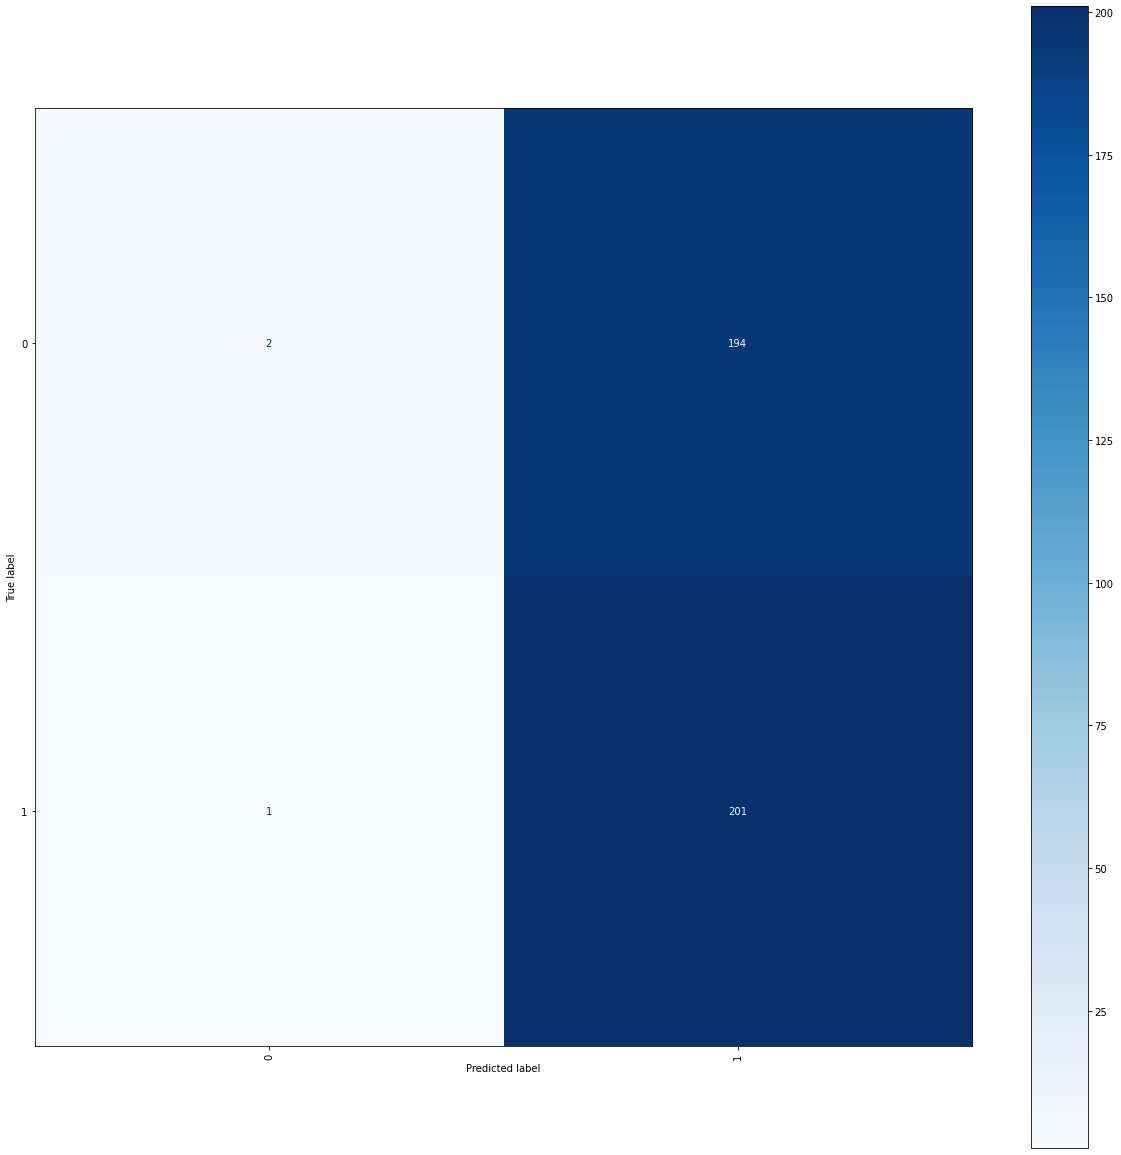

In [117]:
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp
df